## Task2 数据读取与数据分析

### 数据读取


In [12]:
import pandas as pd 

In [35]:
#读取数据
train_df = pd.read_csv('./input/train_set.csv', sep='\t')
#testa_df = pd.read_csv('./input/test_a.csv', sep='\t')
#testa_sample = pd.read_csv('./input/test_a_sample_submit.csv', sep='\t')

display(train_df.head())


,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...


### 训练数据数据分析
通过数据分析找出一些分布规律的。

此步骤我们读取了所有的训练集数据，在此我们通过数据分析希望得出以下结论：

- 赛题数据中，新闻文本的长度是多少？
- 赛题数据的类别分布是怎么样的，哪些类别比较多？
- 赛题数据中，字符分布是怎么样的？

#### 句子（此处指整段新闻文本）长度分析

在赛题数据中每行句子的字符使用空格进行隔开，所以可以直接统计单词的个数来得到每个句子的长度。统计并如下：

In [36]:
%pylab inline
train_df['text_len'] = train_df['text'].apply(lambda x: len(x.split(' ')))
print(train_df['text_len'].describe())

Populating the interactive namespace from numpy and matplotlib
count    200000.000000
mean        907.207110
std         996.029036
min           2.000000
25%         374.000000
50%         676.000000
75%        1131.000000
max       57921.000000
Name: text_len, dtype: float64


Text(0.5, 1.0, 'Histogram of char count')

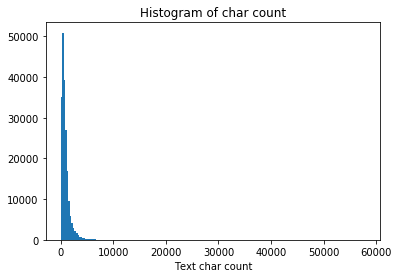

In [37]:
plt.hist(train_df['text_len'], bins=200)#绘制条形图，条数bins，越大越密
plt.xlabel('Text char count')
plt.title("Histogram of char count")

#### 新闻类别分布
具体统计每类新闻的样本个数。查看分布是否均匀。

Text(0.5, 0, 'category')

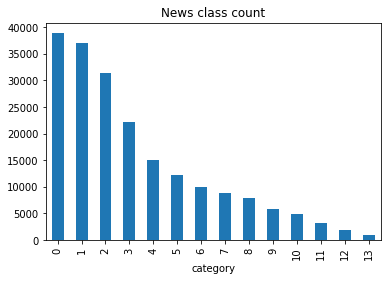

In [38]:
train_df['label'].value_counts().plot(kind='bar')#计数，画图
plt.title('News class count')
plt.xlabel("category")

#### 字符分布统计
接下来可以统计每个字符出现的次数，首先可以将训练集中所有的句子进行拼接进而划分为字符，并统计每个字符的个数。

从统计结果中可以看出，在训练集中总共包括6869个字，其中编号3750的字出现的次数最多，编号3133的字出现的次数最少。

In [39]:
#collections.Counter()测试
from collections import Counter
s = "hello-python-hello-world"
a = Counter(s)
print(a['l'])

5


In [22]:

from collections import Counter
all_lines = ' '.join(list(train_df['text']))#合成一列
word_count = Counter(all_lines.split(" "))#计数
'''
from collections import Counter
s = "hello-python-hello-world"
a = Counter(s)
print(a.items())
# 结果 
dict_items([('h', 3), ('e', 2), ('l', 5), ('o', 4), ('-', 3), ('p', 1), ('y', 1), ('t', 1), ('n', 1), ('w', 1), ('r', 1), ('d', 1)])
————————————————
版权声明：本文为CSDN博主「ch_improve」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
原文链接：https://blog.csdn.net/ch_improve/article/details/89388389
'''
word_count = sorted(word_count.items(), key=lambda d:d[1], reverse = True)
#输出字符种类
print(len(word_count))
#输出第一名与最后一名
print(word_count[0])
print(word_count[-1])

6869
('3750', 7482224)
('3133', 1)


这里还可以根据字在每个句子的出现情况，反推出标点符号。下面代码统计了不同字符在句子中出现的次数，其中字符3750，字符900和字符648在20w新闻的覆盖率接近99%，很有可能是标点符号。

In [41]:
from collections import Counter
train_df['text_unique'] = train_df['text'].apply(lambda x: ' '.join(list(set(x.split(' ')))))#set去重list拼接
all_lines = ' '.join(list(train_df['text_unique']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d:(d[1]), reverse = True)

#输出前三名
print(word_count[0])
print(word_count[1])
print(word_count[2])

('3750', 197997)
('900', 197653)
('648', 191975)


### 数据分析的结论
通过上述分析我们可以得出以下结论：

- 赛题中每个新闻包含的字符个数平均为1000个，还有一些新闻字符较长；
- 赛题中新闻类别分布不均匀，科技类新闻样本量接近4w，星座类新闻样本量不到1k；
- 赛题总共包括7000-8000个字符；
- 通过数据分析，我们还可以得出以下结论：

    - 每个新闻平均字符个数较多，可能需要截断；（？）

    - 由于【类别不均衡】，会严重影响模型的精度；




### 本章作业
1. 假设字符3750，字符900和字符648是句子的标点符号，请分析赛题每篇新闻平均由多少个句子构成？
2. 统计每类新闻中出现次数对多的字符

In [42]:
#1\假设字符3750，字符900和字符648是句子的标点符号，请分析赛题每篇新闻平均由多少个句子构成？
train_df['marknum'] = train_df['text'].apply(lambda x:x.split(' ').count('3750')+x.split(' ').count('900')+x.split(' ').count('648'))
train_df.head()

,label,text,text_len,text_unique,marknum
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...,1057,5698 2570 6811 2456 4819 4599 910 2646 7426 20...,118
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...,486,6293 6407 7010 3263 5542 3002 656 669 6811 242...,50
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...,764,2434 1078 3196 2570 2282 6811 1777 893 5822 48...,48
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...,1570,5698 3196 4183 2570 1777 2211 5041 893 6567 12...,157
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...,307,6515 4351 2827 6887 1324 6038 1697 3585 3686 1...,28


In [44]:
print('平均句子数'+str(int(train_df['marknum'].mean())))

平均句子数78


In [57]:
#2\统计每类新闻中出现次数对多的字符（不考虑3个标点符号）
from collections import Counter
for i in range(14):
    all_lines = ' '.join(list(train_df[train_df['label']==i]['text']))#合成一列
    word_count = Counter(all_lines.split(" "))#计数
    word_count = sorted(word_count.items(), key=lambda d:d[1], reverse = True)
    for j in range(4):
        if word_count[j][0] not in ['3750','900','648']:
            print(i,word_count[j])
            break

0 ('3370', 503768)
1 ('3370', 626708)
2 ('7399', 351894)
3 ('6122', 187933)
4 ('4411', 120442)
5 ('6122', 159125)
6 ('6248', 193757)
7 ('3370', 159156)
8 ('6122', 57345)
9 ('7328', 46477)
10 ('3370', 67780)
11 ('4939', 18591)
12 ('4464', 51426)
13 ('4939', 9651)
